In [ ]:
from google.colab import drive
import os
import glob
import pathlib
import pandas as pd

In [ ]:
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Data Science/Galaxy Zoo/"

Mounted at /content/drive


In [ ]:
!kaggle competitions download galaxy-zoo-the-galaxy-challenge

galaxy-zoo-the-galaxy-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unpack datasets
!unzip /content/galaxy-zoo-the-galaxy-challenge.zip
!rm /content/galaxy-zoo-the-galaxy-challenge.zip
!unzip /content/images_training_rev1.zip
!unzip /content/training_solutions_rev1.zip

In [ ]:
PATH = '/content/images_training_rev1/'
images = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
print("Images in the dataset: " + '{:,}'.format(len(images)))

Images in the dataset: 61,578


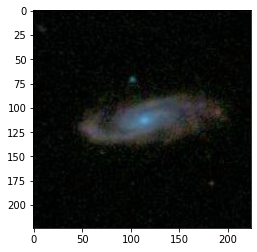

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(PATH + "100380.jpg")
img = img[100:424-100, 100:424-100, :]
plt.imshow(img) # This is not a correct representation! Remember cv2 read in BGR, not RGB

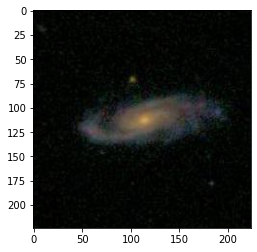

In [ ]:
# Convert BGR to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Convert color spaces

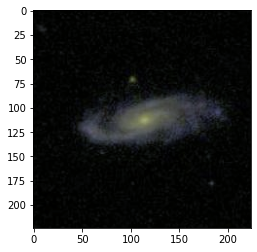

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2XYZ));

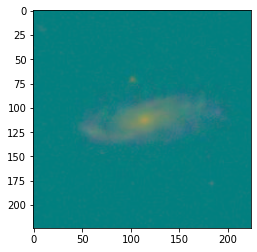

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb));

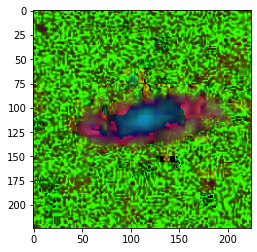

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV));

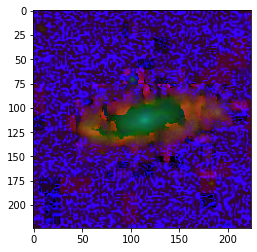

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HLS));

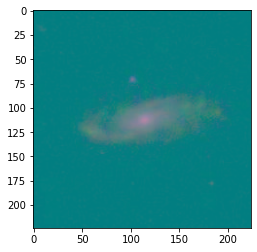

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2Lab));

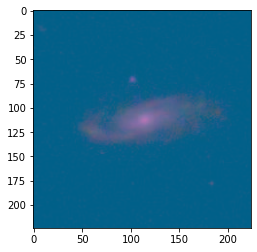

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2Luv));

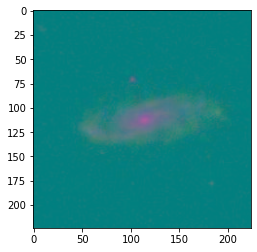

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2YUV));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


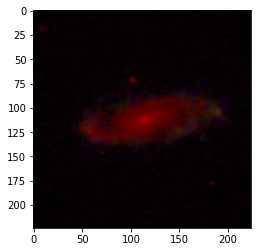

In [ ]:
from skimage.color import rgb2ydbdr
plt.imshow(rgb2ydbdr(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


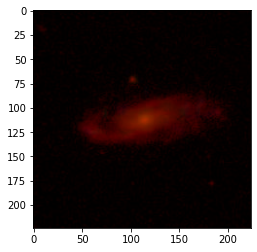

In [ ]:
from skimage.color import rgb2yiq
plt.imshow(rgb2yiq(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


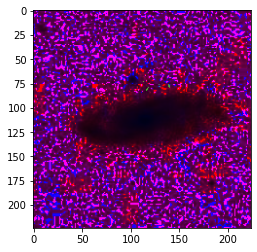

In [ ]:
from skimage.color import rgb2hed
plt.imshow(rgb2hed(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

## Select clean sampels

In [ ]:
labels_classification = pd.read_csv("labels_classification.csv")
labels_classification.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class7.1,Class7.2,Class7.3,Class2.1,Class2.2,Class4.1,Class4.2,class
0,100428,0.715291,0.259587,0.025122,0.562277,0.153014,0.0,0.0,0.259587,0.000000,0.259587,completelysmooth
1,100434,0.748000,0.214000,0.038000,0.561000,0.187000,0.0,0.0,0.214000,0.000000,0.214000,completelysmooth
2,100571,0.713051,0.158890,0.128059,0.642763,0.070288,0.0,0.0,0.158890,0.000000,0.158890,completelysmooth
3,100672,0.931725,0.036703,0.031572,0.708274,0.223451,0.0,0.0,0.036703,0.000000,0.036703,completelysmooth
4,100727,0.816171,0.156441,0.027388,0.766569,0.049602,0.0,0.0,0.156441,0.135761,0.020680,completelysmooth


In [ ]:
labels_classification['GalaxyID'] = labels_classification['GalaxyID'].apply(lambda x: str(x) + ".jpg")

In [ ]:
labels_classification['path'] = labels_classification['GalaxyID'].apply(lambda x: '/content/images_training_rev1/' + x)

In [ ]:
len(labels_classification)/len(images)

0.46758582610672644

In [ ]:
len(labels_classification)

28793

In [ ]:
labels_classification['class'].value_counts()

completelysmooth    8436
inbetweensmooth     8069
spiral              7806
edgeon              3903
cigarsmooth          579
Name: class, dtype: int64

## Batch conversion

In [ ]:
def convert_image(dst_color, dst_path):
  print('Image conversion started...')
  for file in labels_classification['path']:
    img = cv2.imread(file)
    img = img[100:424-100, 100:424-100, :]
    img = cv2.cvtColor(img, dst_color)
    name_img = file[-10:]

    filename = file.split('/')[-1]
    _tmp = labels_classification[labels_classification['GalaxyID'] == filename]
    _cls = _tmp['class']

    _path = dst_path + _cls + '/' + str(name_img)
    cv2.imwrite(_path.values[0], img)

  print("Images converted: " + '{:,}'.format(len(list(pathlib.Path(dst_path).glob('*/*.jpg')))))

In [ ]:
!rm -rf img_XYZ
!mkdir img_XYZ
!mkdir img_XYZ/completelysmooth
!mkdir img_XYZ/inbetweensmooth
!mkdir img_XYZ/cigarsmooth
!mkdir img_XYZ/edgeon
!mkdir img_XYZ/spiral
convert_image(cv2.COLOR_BGR2XYZ, '/content/img_XYZ/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_YCrCb
!mkdir img_YCrCb
!mkdir img_YCrCb/completelysmooth
!mkdir img_YCrCb/inbetweensmooth
!mkdir img_YCrCb/cigarsmooth
!mkdir img_YCrCb/edgeon
!mkdir img_YCrCb/spiral
convert_image(cv2.COLOR_BGR2YCrCb, '/content/img_YCrCb/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_HSV
!mkdir img_HSV
!mkdir img_HSV/completelysmooth
!mkdir img_HSV/inbetweensmooth
!mkdir img_HSV/cigarsmooth
!mkdir img_HSV/edgeon
!mkdir img_HSV/spiral
convert_image(cv2.COLOR_BGR2HSV, '/content/img_HSV/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_HLS
!mkdir img_HLS
!mkdir img_HLS/completelysmooth
!mkdir img_HLS/inbetweensmooth
!mkdir img_HLS/cigarsmooth
!mkdir img_HLS/edgeon
!mkdir img_HLS/spiral
convert_image(cv2.COLOR_BGR2HLS, '/content/img_HLS/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_Lab
!mkdir img_Lab
!mkdir img_Lab/completelysmooth
!mkdir img_Lab/inbetweensmooth
!mkdir img_Lab/cigarsmooth
!mkdir img_Lab/edgeon
!mkdir img_Lab/spiral
convert_image(cv2.COLOR_BGR2Lab, '/content/img_Lab/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_Luv
!mkdir img_Luv
!mkdir img_Luv/completelysmooth
!mkdir img_Luv/inbetweensmooth
!mkdir img_Luv/cigarsmooth
!mkdir img_Luv/edgeon
!mkdir img_Luv/spiral
convert_image(cv2.COLOR_BGR2Luv, '/content/img_Luv/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_YUV
!mkdir img_YUV
!mkdir img_YUV/completelysmooth
!mkdir img_YUV/inbetweensmooth
!mkdir img_YUV/cigarsmooth
!mkdir img_YUV/edgeon
!mkdir img_YUV/spiral
convert_image(cv2.COLOR_BGR2YUV, '/content/img_YUV/')

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_YIQ
!mkdir img_YIQ
!mkdir img_YIQ/completelysmooth
!mkdir img_YIQ/inbetweensmooth
!mkdir img_YIQ/cigarsmooth
!mkdir img_YIQ/edgeon
!mkdir img_YIQ/spiral

print('Image conversion started...')
for file in labels_classification['path']:
  img = cv2.imread(file)
  img = img[100:424-100, 100:424-100, :]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = rgb2yiq(img)
  name_img = file[-10:]

  filename = file.split('/')[-1]
  _tmp = labels_classification[labels_classification['GalaxyID'] == filename]
  _cls = _tmp['class']

  _path = '/content/img_YIQ/' + _cls + '/' + str(name_img)
  cv2.imwrite(_path.values[0], img)

print("Images converted: " + '{:,}'.format(len(list(pathlib.Path('/content/img_YIQ/').glob('*/*.jpg')))))

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_HED
!mkdir img_HED
!mkdir img_HED/completelysmooth
!mkdir img_HED/inbetweensmooth
!mkdir img_HED/cigarsmooth
!mkdir img_HED/edgeon
!mkdir img_HED/spiral

print('Image conversion started...')
for file in labels_classification['path']:
  img = cv2.imread(file)
  img = img[100:424-100, 100:424-100, :]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = rgb2hed(img)
  name_img = file[-10:]

  filename = file.split('/')[-1]
  _tmp = labels_classification[labels_classification['GalaxyID'] == filename]
  _cls = _tmp['class']

  _path = '/content/img_HED/' + _cls + '/' + str(name_img)
  cv2.imwrite(_path.values[0], img)

print("Images converted: " + '{:,}'.format(len(list(pathlib.Path('/content/img_HED/').glob('*/*.jpg')))))

Image conversion started...
Images converted: 28,793


In [ ]:
!rm -rf img_YDbDr
!mkdir img_YDbDr
!mkdir img_YDbDr/completelysmooth
!mkdir img_YDbDr/inbetweensmooth
!mkdir img_YDbDr/cigarsmooth
!mkdir img_YDbDr/edgeon
!mkdir img_YDbDr/spiral

print('Image conversion started...')
for file in labels_classification['path']:
  img = cv2.imread(file)
  img = img[100:424-100, 100:424-100, :]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = rgb2ydbdr(img)
  name_img = file[-10:]

  filename = file.split('/')[-1]
  _tmp = labels_classification[labels_classification['GalaxyID'] == filename]
  _cls = _tmp['class']

  _path = '/content/img_YDbDr/' + _cls + '/' + str(name_img)
  cv2.imwrite(_path.values[0], img)

print("Images converted: " + '{:,}'.format(len(list(pathlib.Path('/content/img_YDbDr/').glob('*/*.jpg')))))

Image conversion started...
Images converted: 28,793


In [ ]:
!zip -r /content/img_RGB.zip /content/images_training_rev1
!zip -r /content/img_HED.zip /content/img_HED
!zip -r /content/img_HLS.zip /content/img_HLS
!zip -r /content/img_HSV.zip /content/img_HSV
!zip -r /content/img_Lab.zip /content/img_Lab
!zip -r /content/img_Luv.zip /content/img_Luv
!zip -r /content/img_XYZ.zip /content/img_XYZ
!zip -r /content/img_YCrCb.zip /content/img_YCrCb
!zip -r /content/img_YDbDr.zip /content/img_YDbDr
!zip -r /content/img_YIQ.zip /content/img_YIQ
!zip -r /content/img_YUV.zip /content/img_YUV

In [ ]:
!rm -rf img_RGB
!mkdir img_RGB
!mkdir img_RGB/completelysmooth
!mkdir img_RGB/inbetweensmooth
!mkdir img_RGB/cigarsmooth
!mkdir img_RGB/edgeon
!mkdir img_RGB/spiral

print('Image conversion started...')
for file in labels_classification['path']:
  img = cv2.imread(file)
  img = img[100:424-100, 100:424-100, :]
  name_img = file[-10:]

  filename = file.split('/')[-1]
  _tmp = labels_classification[labels_classification['GalaxyID'] == filename]
  _cls = _tmp['class']

  _path = '/content/img_RGB/' + _cls + '/' + str(name_img)
  cv2.imwrite(_path.values[0], img)

print("Images converted: " + '{:,}'.format(len(list(pathlib.Path('/content/img_RGB/').glob('*/*.jpg')))))

Image conversion started...
Images converted: 28,793


In [ ]:
!zip -r /content/img_RGB.zip /content/img_RGB

In [ ]:
!rm -rf /content/drive/MyDrive/galaxy-images/
!mkdir /content/drive/MyDrive/galaxy-images/

In [ ]:
!cp /content/img_RGB.zip /content/drive/MyDrive/galaxy-images/img_RGB.zip
!cp /content/img_HED.zip /content/drive/MyDrive/galaxy-images/img_HED.zip
!cp /content/img_HLS.zip /content/drive/MyDrive/galaxy-images/img_HLS.zip
!cp /content/img_HSV.zip /content/drive/MyDrive/galaxy-images/img_HSV.zip
!cp /content/img_Lab.zip /content/drive/MyDrive/galaxy-images/img_Lab.zip
!cp /content/img_Luv.zip /content/drive/MyDrive/galaxy-images/img_Luv.zip
!cp /content/img_XYZ.zip /content/drive/MyDrive/galaxy-images/img_XYZ.zip
!cp /content/img_YCrCb.zip /content/drive/MyDrive/galaxy-images/img_YCrCb.zip
!cp /content/img_YDbDr.zip /content/drive/MyDrive/galaxy-images/img_YDbDr.zip
!cp /content/img_YIQ.zip /content/drive/MyDrive/galaxy-images/img_YIQ.zip
!cp /content/img_YUV.zip /content/drive/MyDrive/galaxy-images/img_YUV.zip